# Importing Libraries

In [1]:
import seaborn as sns
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pandas as pd

# Importing Dataset

In [2]:
dataset_url = 'https://raw.githubusercontent.com/AdiPersonalWorks/Random/master/student_scores%20-%20student_scores.csv'
dataset = pd.read_csv(dataset_url)
X = dataset.iloc[:, :-1]
y = dataset.iloc[:, -1:]

# Exploring and Preprocessing

In [3]:
dataset.head()

,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30


In [4]:
dataset.describe()

,Hours,Scores
count,25.000000,25.000000
mean,5.012000,51.480000
std,2.525094,25.286887
min,1.100000,17.000000
25%,2.700000,30.000000
50%,4.800000,47.000000
75%,7.400000,75.000000
max,9.200000,95.000000


In [5]:
dataset.shape

(25, 2)

### Plotting to check the corelation

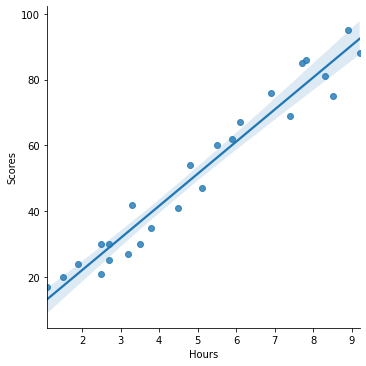

In [6]:
f = sns.lmplot(data = dataset, x = 'Hours', y = 'Scores')

###### Here we have gathered, that there is a ***strong positive linear corelation*** between the features Scores, and Hours.

### Spliting the dataset

As we have a very small dataset, so the test-set will be kept small, inorder to avoid insufficiency when training the model. A random_state = 0 has also been selected to replicate the results later on.

In [7]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.15, random_state = 0)

In [8]:
print("X_train: " , X_train, "\nX_test: ", X_test, "\nY_test: ", y_test, "\ny_train: ", y_train)

X_train:      Hours
11    5.9
22    3.8
17    1.9
24    7.8
23    6.9
14    1.1
1     5.1
10    7.7
13    3.3
8     8.3
6     9.2
18    6.1
4     3.5
9     2.7
7     5.5
20    2.7
3     8.5
0     2.5
21    4.8
15    8.9
12    4.5 
X_test:      Hours
5     1.5
2     3.2
19    7.4
16    2.5 
Y_test:      Scores
5       20
2       27
19      69
16      30 
y_train:      Scores
11      62
22      35
17      24
24      86
23      76
14      17
1       47
10      85
13      42
8       81
6       88
18      67
4       30
9       25
7       60
20      30
3       75
0       21
21      54
15      95
12      41


### Using Feature scaling and comparing the results at the end

In [9]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
sc_ = StandardScaler()

X_train_scaled = sc.fit_transform(X_train)
X_test_scaled = sc.transform(X_test)

y_train_scaled = sc_.fit_transform(y_train)
y_test_scaled = sc_.transform(y_test)

# Modeling

For ***Unscaled Data***

In [10]:
from sklearn.linear_model import LinearRegression
# For Unscaled
regressor = LinearRegression()

regressor.fit(X_train, y_train)

y_pred = regressor.predict(X_test)
y_pred_train = regressor.predict(X_train)

For ***Scaled Data***

In [11]:
regressor_s = LinearRegression()

regressor_s.fit(X_train_scaled, y_train_scaled)

y_pred_s = regressor_s.predict(X_test_scaled)
y_pred_tain_s = regressor_s.predict(X_train_scaled)

# Evaluating Model

For ***Unscaled Set***

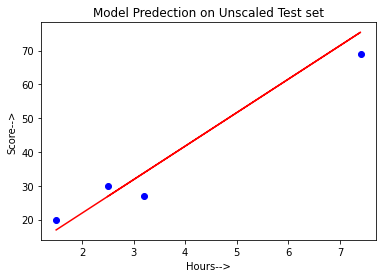

In [12]:
plt.scatter(X_test, y_test, color = 'blue')
plt.plot(X_test, y_pred, color = 'red')
plt.xlabel('Hours-->')
plt.ylabel('Score-->')
plt.title('Model Predection on Unscaled Test set')
plt.show()

For ***Scaled Set***

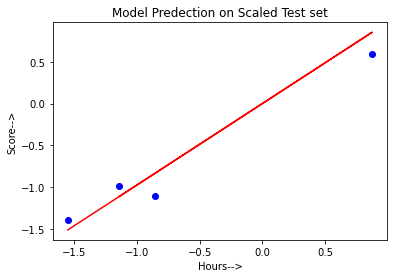

In [13]:
plt.scatter(X_test_scaled, y_test_scaled, color = 'blue')
plt.plot(X_test_scaled, y_pred_s, color = 'red')
plt.xlabel('Hours-->')
plt.ylabel('Score-->')
plt.title('Model Predection on Scaled Test set')
plt.show()

### Using sklearn.metrics to evaluate the dataset

***For Unscaled Data***

In [14]:
from sklearn.metrics import mean_absolute_error, r2_score
print("For Unscaled Dataset: ")
print("Mean Absolute Error: ", mean_absolute_error(y_test, y_pred))
print("r2 score: ", r2_score(y_test, y_pred))

For Unscaled Dataset: 
Mean Absolute Error:  4.865206019265337
r2 score:  0.9267527498952749


***For Scaled Data***

In [15]:
print("For Scaled Data: ")
print("Mean Absolute Error: ", mean_absolute_error(y_test_scaled, y_pred_s))
print("r2 score: ", r2_score(y_test_scaled, y_pred_s))

For Scaled Data: 
Mean Absolute Error:  0.19693519528604247
r2 score:  0.926752749895275


#### In conclusion, the model has performed better (mean absolute error) on the scaled dataset. Thus, prediction will be carried with regressor_s.

In [16]:
print('For 9.25 hours/day: ', sc_.inverse_transform(regressor_s.predict(sc.transform([[9.25]])))[0][0])

For 9.25 hours/day:  93.79402490359648
